In [14]:
import numpy as np
import matplotlib.pyplot as plt
import math

## The SI Model

S (Susceptible): Individuals who are susceptible to the disease but have not been
infected.

I (Infected): Individuals who are currently infected and can spread the disease.

### 1.1 Model the Infection It = It−1 + βIt−1

In [15]:
# Create an array I of length nDays
I = np.array([0.0] * 365)
#set the initial value of I:
I[0] = 3.0
#set beta:
beta = 0.02

# Iterate over the array I to calculate the values of I
for i in range(1, len(I)):
    I[i] = min(I[i-1] + beta*I[i-1],100)


### Plot the results in a graph

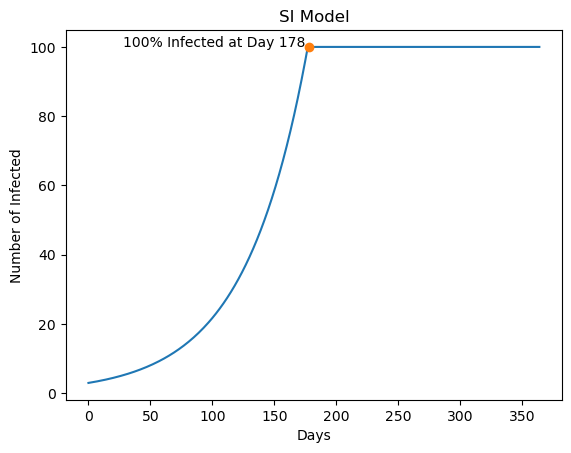

In [16]:
#Fiding the day at which the whole population is infected
x = np.where(I == 100)[0][0]
y = I[x]

#Plot the results
plt.plot(I)
plt.plot(x, y, 'o')
plt.text(x-150, y, '100% Infected at Day ' + str(x))
plt.xlabel('Days')
plt.ylabel('Number of Infected')
plt.title('SI Model')
#plt.savefig('SI_Model.png')
#plt.clf()
plt.show()

### 1.2 Vary the Parameters

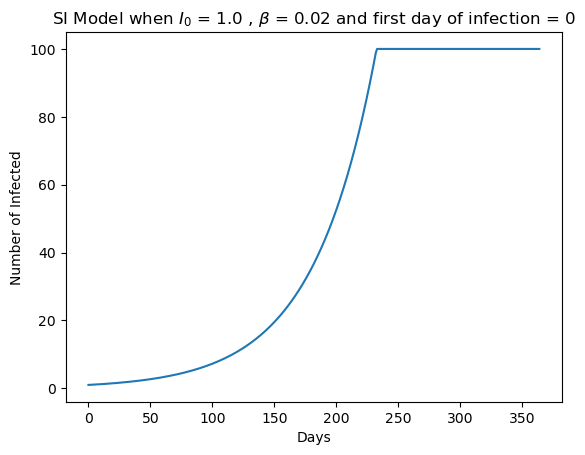

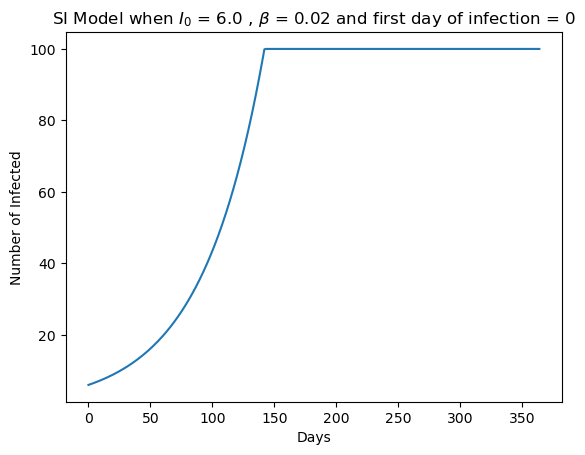

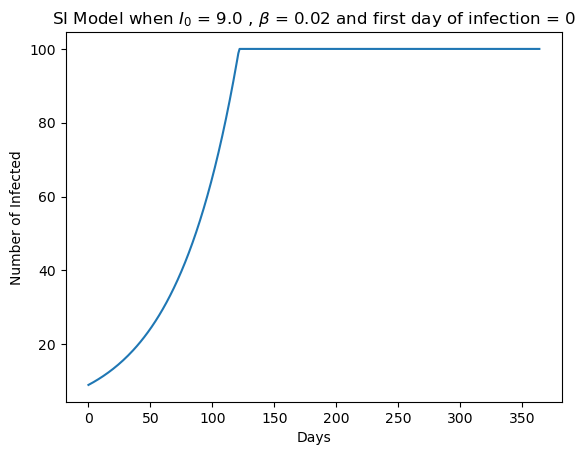

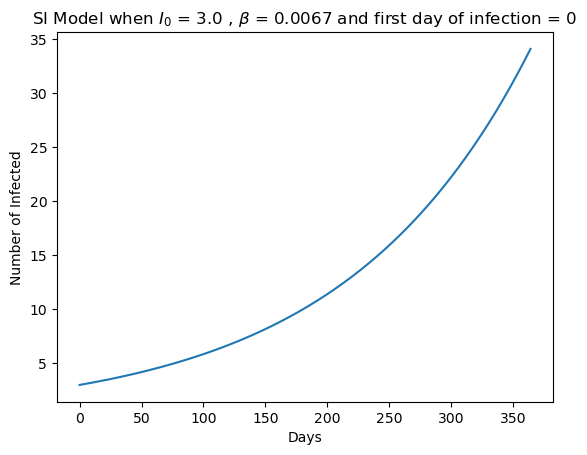

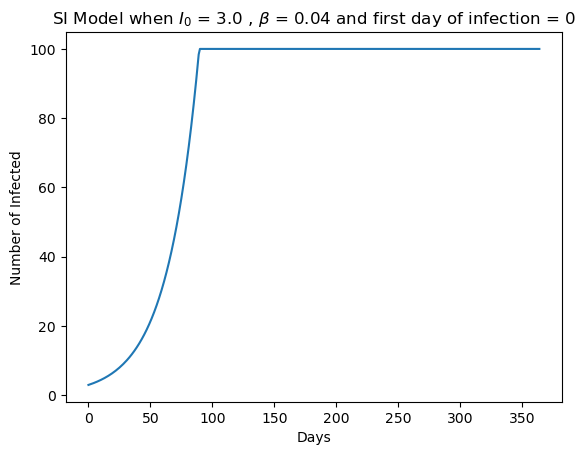

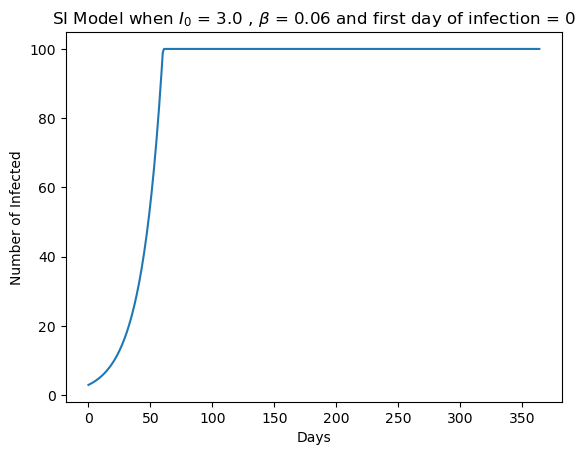

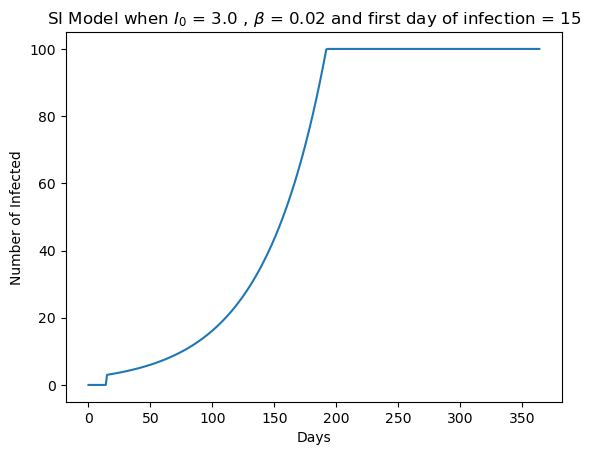

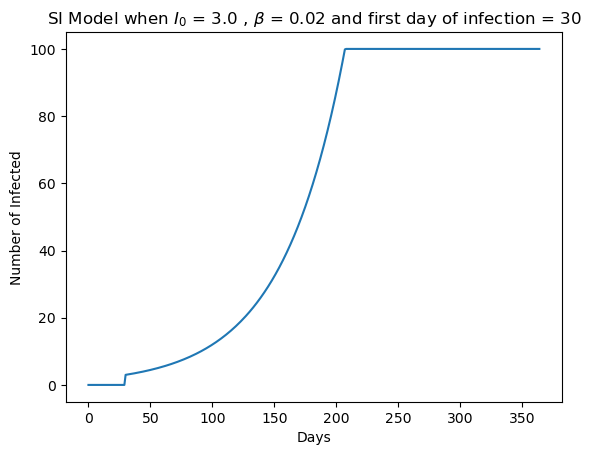

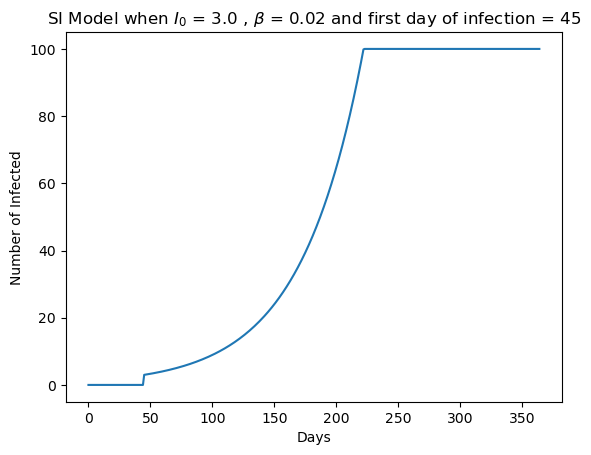

In [17]:
def SI_model_infected(i_infected, beta, first_day):
    I = np.array(np.zeros(365))
    I[first_day] = i_infected

    for i in range(first_day + 1, len(I)):
        I[i] = min(I[i-1] + beta*I[i-1], 100)

    plt.plot(I)
    plt.xlabel('Days')
    plt.ylabel('Number of Infected')
    plt.title('SI Model when $I_0$ = ' + str(I[first_day]) + 
              ' , ' + r'$\beta$ = ' + str(beta) + 
              ' and first day of infection = ' + str(first_day))
    plt.show()
    #plt.savefig('SI_Model_' + "I_" + str(i_infected) + '_' + "B_" + str(beta) + '_' + "D_" + str(first_day) + '.png')
    #plt.clf()
    
#Varying Initial Infected
SI_model_infected(1, 0.02, 0)
SI_model_infected(6, 0.02, 0)
SI_model_infected(9, 0.02, 0)

# Varying Beta
SI_model_infected(3, 0.0067, 0)
SI_model_infected(3, 0.04, 0)
SI_model_infected(3, 0.06, 0)


#Varying First Day of Infection
SI_model_infected(3, 0.02, 15)
SI_model_infected(3, 0.02, 30)
SI_model_infected(3, 0.02, 45)



### 1.3 Plot the S and I curve together from the first graph.

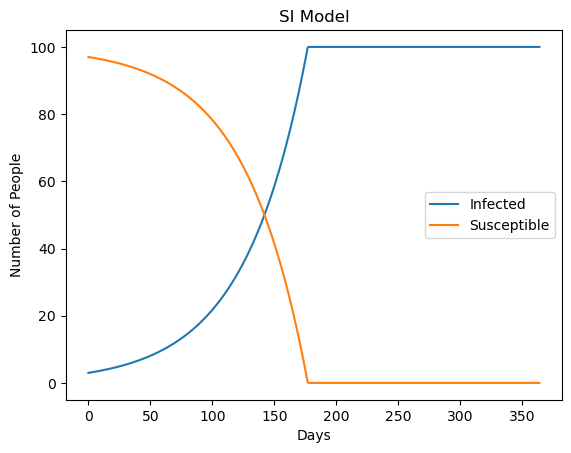

In [18]:
def SI_infected_healthy(i_initial, beta):
    I_infected = np.array(np.zeros(365))
    I_susceptible = np.array(np.zeros(365) + 100)
    
    I_infected[0] = i_initial
    I_susceptible[0] = 100 - i_initial
    for i in range(1, len(I_infected)):
        I_infected[i] = min(I_infected[i-1] + beta*I_infected[i-1], 100)        
        I_susceptible[i] = min(I_susceptible[i] - I_infected[i], 100)
    
    plt.plot(I_infected, label = 'Infected')
    plt.plot(I_susceptible, label = 'Susceptible')
    plt.xlabel('Days')
    plt.ylabel('Number of People')
    plt.title('SI Model')
    plt.legend(loc = 'center right')
    plt.show()
    #plt.savefig('SI_Model_Infected_Healthy.png')
    #plt.clf()   
    
SI_infected_healthy(3, 0.02)

#### 1.4 Implementing the model where the number of new cases is proportional to the probability of getting in contact with healthy individuals. i.e., It = It−1 + ((β * It−1 * St−1)/N)

In [19]:
#Model that accounts for the fact that the number of new cases is proporortional to the probability of contact between infected and healthy individuals

def SI_contact(i_initial, beta):
    N = 100
    period = 365 * 2
    
    I_infected = np.array(np.zeros(period))
    I_susceptible = np.array(np.zeros(period) + 100)
    
    I_infected[0] = i_initial
    I_susceptible[0] = I_susceptible[0] - I_infected[0]

    #Loop to populate the arrays
    for i in range(1, len(I_infected)):
        I_infected[i] = min(I_infected[i-1] + ((beta / N * I_infected[i-1] * I_susceptible[i-1])), 100)
        I_susceptible[i] = min(100 - I_infected[i], 100)
    
    plt.plot(I_infected, label = 'Infected')
    plt.plot(I_susceptible, label = 'Healthy')
    plt.xlabel('Days')
    plt.ylabel('Number of People')
    plt.title('SI Model with Contact, $I_0$ = ' + str(I_infected[0]) + ' and ' + r'$\beta$ = ' + str(beta))
    plt.legend(loc = 'upper right')
    
    #then plot the points where the two graphs intersect, i.e., where the sign switches:
    x = 0
    for i in range(0, len(I_infected)):
        if I_infected[i] > I_susceptible[i]:
            x = i
            break
    y = I_infected[x]

    if x!= 0: #otherwise, if there is no intersection it throws an error.
        plt.plot(x, y, 'o')
        plt.text(x + 10, y, 'Infected = Healthy at Day ' + str(x))
    else:
        plt.text(10, 50, 'No Intersection during period')
    
    #plt.savefig('SI_Contact_' + "I" + str(i_initial) + '_' + "B" + str(beta) + '.png')
    #plt.clf()
    plt.show()
    
    
    
   

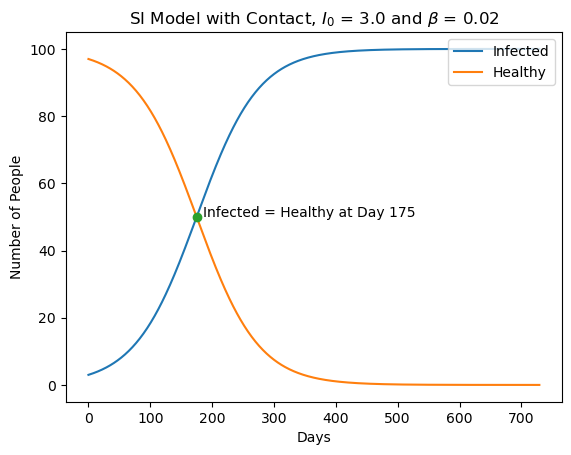

In [20]:
SI_contact(3, 0.02)

#### 1.5 Change the parameters.

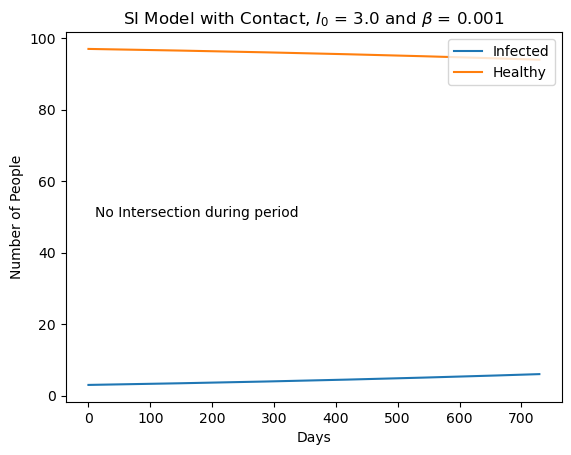

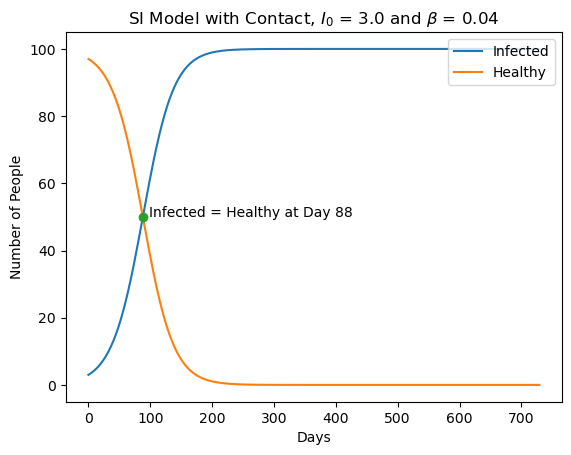

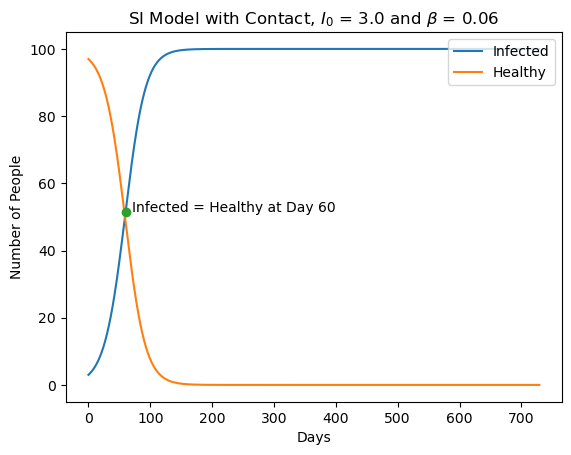

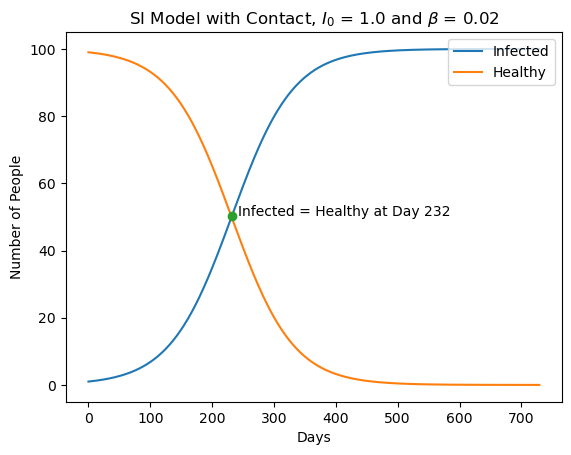

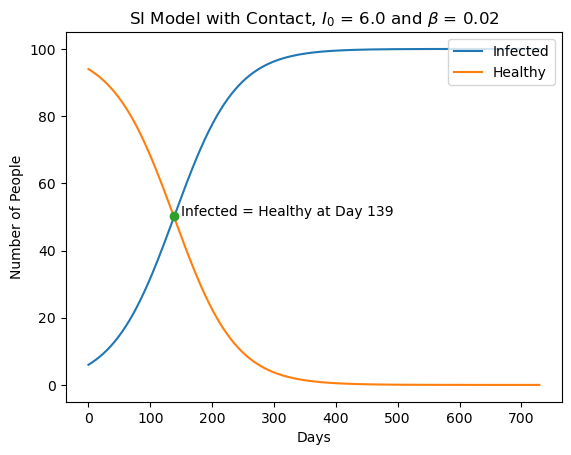

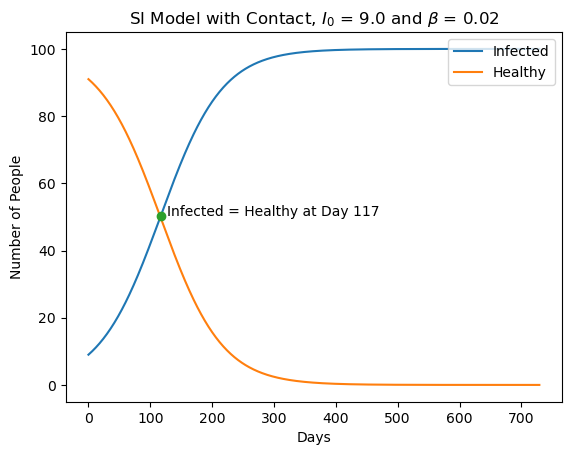

In [21]:
SI_contact(3, 0.001)

SI_contact(3, 0.04)

SI_contact(3, 0.06)


SI_contact(1, 0.02)

SI_contact(6, 0.02)

SI_contact(9, 0.02)


## 2. Adding a treatment: the SIS model It = It−1 + β/N * It−1* St−1 − γIt−1

#### 2.1 Simulate the curves S and I. Set γ = 0.006 and simulate the pandemics over 2 years.

In [22]:
def SIS_model(i_initial, beta, gamma):
    N = 100
    period = 365 * 2
    
    I_infected = np.array(np.zeros(period))
    I_susceptible = np.array(np.zeros(period) + 100)
    
    I_infected[0] = i_initial
    I_susceptible[0] = I_susceptible[0] - I_infected[0]

    #Loop to populate the arrays
    for i in range(1, len(I_infected)):
        I_infected[i] = min(I_infected[i-1] + ((beta / N * I_infected[i-1] * I_susceptible[i-1]) - (gamma * I_infected[i-1])), 100)
        I_susceptible[i] = min(I_susceptible[i] - I_infected[i], 100)
        
    
    plt.plot(I_infected, label = 'Infected')
    plt.plot(I_susceptible, label = 'Healthy')
    plt.xlabel('Days')
    plt.ylabel('Number of People')
    plt.title('SIS Model, $\sigma$: ' + str(round(beta/gamma, 2)) + ' $I_0$: ' + str(I_infected[0]) + r' $\beta$: ' + str(beta) + ' $\gamma$: ' + str(gamma))
    plt.legend(loc = 'upper right')
    
    #plt.savefig('SIS_Model_' + "I" + str(i_initial) + '_' + "B" + str(beta) + '_' + "G" + str(gamma) + '.png')
    #plt.clf()
    plt.show()  

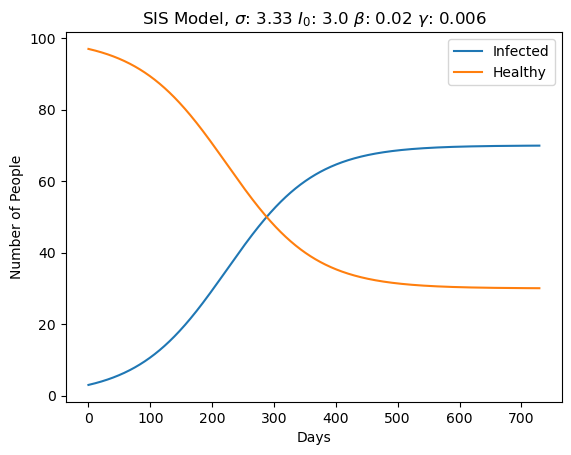

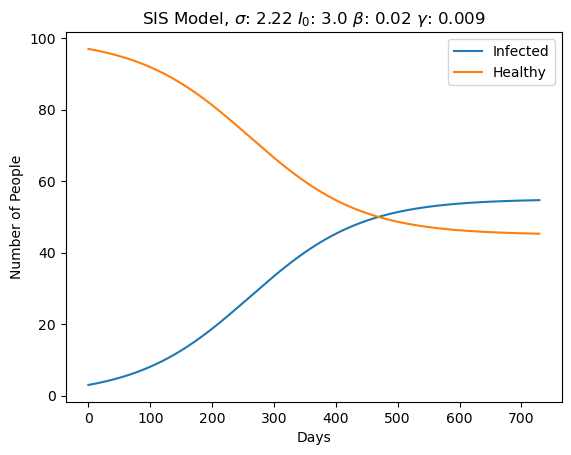

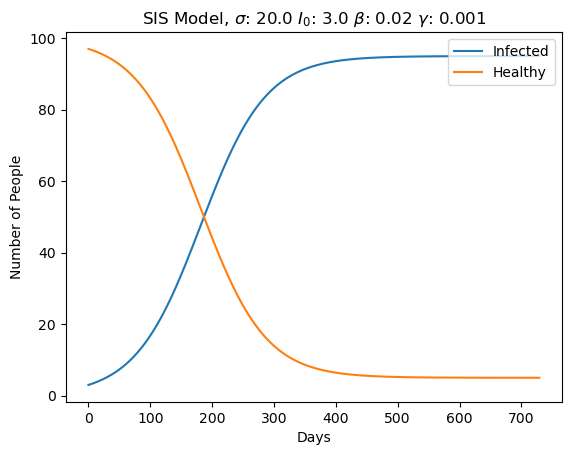

In [23]:
SIS_model(3, 0.02, 0.006)
SIS_model(3, 0.02, 0.009)
SIS_model(3, 0.02, 0.001)

#### 2.2 Vary β/γ and observe the S curve.

In [24]:
def S_curve_variation_SIS_model(i_initial, beta, gamma):
    N = 100
    period = 365 * 2
    
    I_infected = np.array(np.zeros(period))
    I_susceptible = np.array(np.zeros(period) + 100)
    
    I_infected[0] = i_initial
    I_susceptible[0] = I_susceptible[0] - I_infected[0]

    #Loop to populate the arrays
    for i in range(1, len(I_infected)):
        I_infected[i] = min(I_infected[i-1] + ((beta / N * I_infected[i-1] * I_susceptible[i-1]) - (gamma * I_infected[i-1])), 100)
        I_susceptible[i] = min(I_susceptible[i] - I_infected[i], 100)
    

    plt.plot(I_susceptible)
    plt.xlabel('Days')
    plt.ylabel('Population Susceptible')
    plt.yticks(np.arange(0, 140, 20))
    plt.title('S curve: $\sigma$: ' + str(round(beta/gamma, 2)) + ' $I_0$: ' + str(I_infected[0]) + r' $\beta$: ' + str(beta) + ' $\gamma$: ' + str(gamma))

    plt.show()
    #plt.savefig('Scurve_S'+ str(round(beta/gamma, 2)) + '_I' + str(I_infected[0]) + '_B' + str(beta) + '_G' + str(gamma) + '.png')
    #plt.clf()

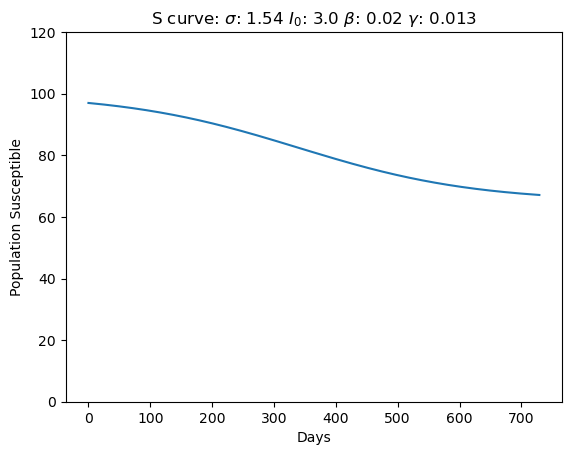

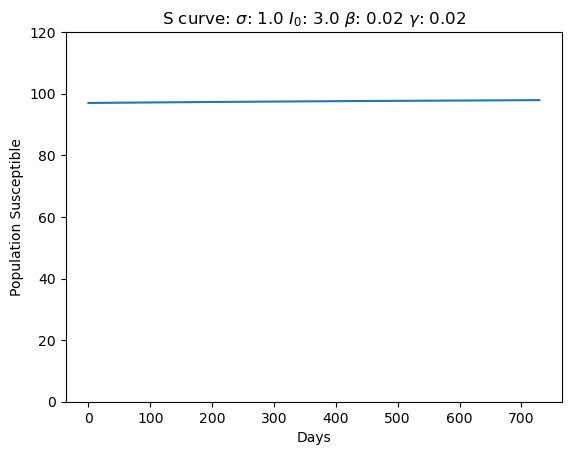

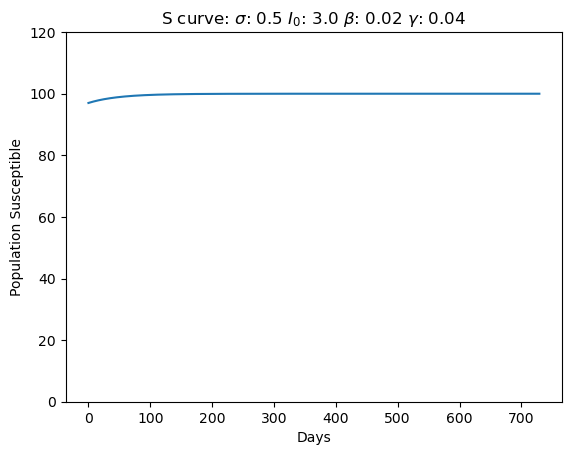

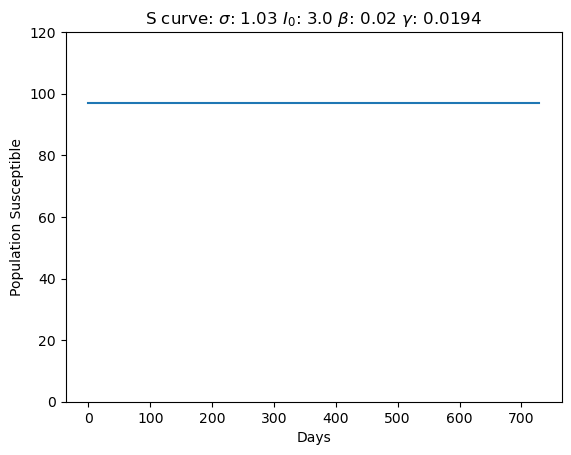

In [25]:
S_curve_variation_SIS_model(3, 0.02, 0.013)
S_curve_variation_SIS_model(3, 0.02, 0.02)
S_curve_variation_SIS_model(3, 0.02, 0.04)

#Equilibrium:
S_curve_variation_SIS_model(3, 0.02, 0.0194)